## CM4044: AI In Chemistry
## Semester 1 2020/21

<hr>

## Tutorial 5.2: Common Machine Learning (ML) Algorithms Part II
## Objectives

### $\bullet$ Support Vector Machine (SVM)
### $\bullet$ Naive Bayes

<hr>

This tutorial continues the first part of the same topic, "Introduction to Common Machine Learning Algorithms".

## 1. Support Vector Machine (SVM)

### 1.1 Background

Support Vector Machine (SVM) is one of the most powerful out-of-the-box supervised machine learning algorithms. Unlike many other machine learning algorithms such as neural networks, **you don’t have to do a lot of tweaks to obtain good results with SVM**.

<u>It can be used both for **regression** and **classification** tasks, but widely used in classification objectives.</u> In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as **Support Vectors**)

<img src="./SVM1.jpg" width="300" height="300" />

Now, we will find some line that splits the data between the two differently classified groups of data. This will be the line such that the distances from the closest point in each of the two groups will be farthest away.

<img src="./SVM2.jpg" width="300" height="300" />

In the example shown above, the line which splits the data into two differently classified groups is the black line, since the two closest points are the farthest apart from the line. This line is our classifier. Then, depending on where the testing data lands on either side of the line, that’s what class we can classify the new data as.

#### Think of this algorithm as playing JezzBall in n-dimensional space. The tweaks in the game are:

- You can draw lines / planes at any angles (rather than just horizontal or vertical as in classic game)
- The objective of the game is to segregate balls of different colors in different rooms.
- And the balls are not moving.

Finally, you should note that **SVM is one of the most powerful ML classification algorithms**. When it is used in conjunction with random forest and other machine learning tools, they give a very different dimension to ensemble models. Hence, they become very crucial for cases where very high predictive power is required. Such algorithms are slightly harder to visualize because of the complexity in formulation. You will find these algorithms very useful to solve some of the Kaggle problem statement.

### 1.2 An Example: Classfication of Iris

Below we check an well-known example about the classification of iris by SVM model.
Information about the dataset of iris flowers can be found from [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="./flower.jpg" width="300" height="300" />


In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns

# Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv("./iris.csv", names=names)

# shape
print(iris.shape)

# head
print(iris.head(10))

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [2]:
# class distribution
print(iris.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### Univariate Plots

   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1


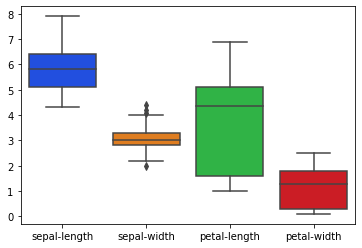

In [3]:
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
iris_drop_class = iris.drop(['class'], axis = 1)
print(iris_drop_class.head(10))

# New boxplot using stats_df
ax = sns.boxplot(data=iris_drop_class, palette = 'bright')
#plt.show()



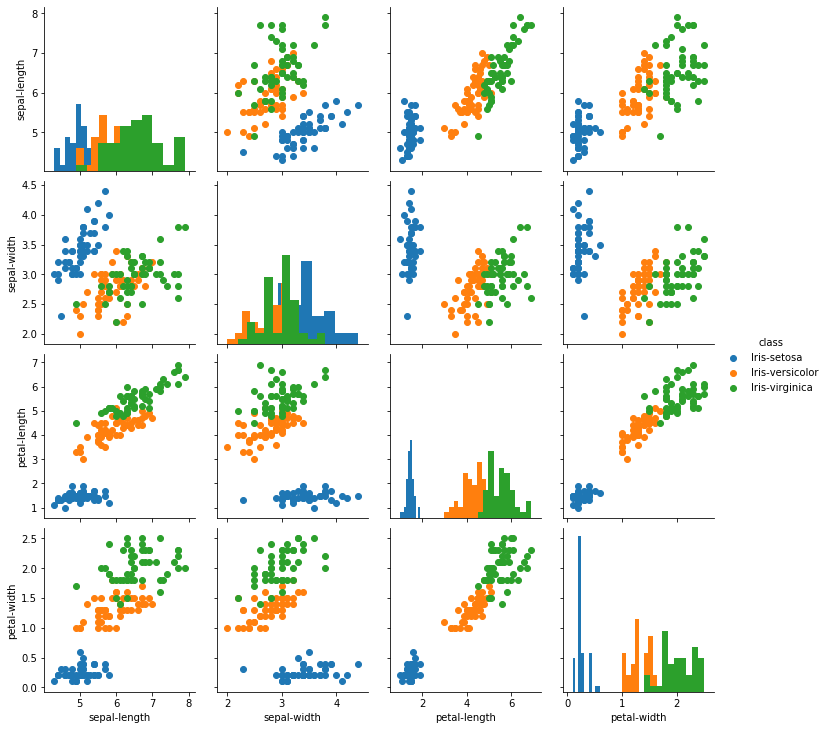

In [4]:
g = sns.PairGrid(iris, hue="class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Data Splitting and Model Training

In [5]:
seed = 7
scoring = 'accuracy'

# Split-out validation dataset
array = iris.to_numpy()
X = array[:,0:4]
Y = array[:,4]   # an array of label, which is a string of the class name of iris

#train test split
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)



Model training and cross validation together:

In [6]:
# Spot Check Algorithms
models = []
models.append(('SVM', SVC())) # default kernel `rbf`
models.append(('SVM Linear Kernel', SVC(kernel='linear'))) # use linear kernel
models.append(('SVM Poly Kernel', SVC(kernel='poly', degree=8))) # use polynominal kernel

# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Split dataset into k consecutive folds (without shuffling by default).
    # return train/test indices to split data in train/test sets
    kfold = model_selection.KFold(n_splits=10)
    print('kfold = ', kfold)
    #internally, scikit-learn calls a function 'LabelEncoder()' to change string into numbers
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

kfold =  KFold(n_splits=10, random_state=None, shuffle=False)
SVM: 0.983333 (0.033333)
kfold =  KFold(n_splits=10, random_state=None, shuffle=False)
SVM Linear Kernel: 0.983333 (0.033333)
kfold =  KFold(n_splits=10, random_state=None, shuffle=False)
SVM Poly Kernel: 0.975000 (0.053359)


Use the trained model for Prediction

In [7]:
# Make predictions on validation dataset
svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
predictions = svc_clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



### 1.3 Hyperparameter tuning in SVM model

Some hyperparameters may be tuned to achieve the best performance. They are:

- Kernel: There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

- Regularization: Regularization parameter in python's Scikit-learn `C` parameter used to maintain regularization. A smaller value of `C` creates a small-margin hyperplane and a larger value of `C` creates a larger-margin hyperplane.

- Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

Hyperparameters tuning in SVM model should be performed with `sklearn.model_selection.GridSearchCV()` or `sklearn.model_selection.RandomizedSearchCV()`. Their usage will be introduced once we complete the introduction to all common ML methods.

Advantages:

SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm (in the second part of this tutorial). They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

Disadvantages:

The SVM Classifiers are not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.
If users like to use SVM model to deal with large datasets, they should consider to use `.

Finally, the interface of SVM in scikit-learn:
1. Classifier

`sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)`
2. Regressor

`sklearn.svm.LinearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)`

Details of these methods can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)

## 2. Naive Bayes

### 2.1 Background


<u>Naive Bayes is a classification technique</U> based on [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that **the presence of a particular feature in a class is unrelated to the presence of any other feature.** For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple. The model is named "naive" because of the ideal independent feature assumption, which is almost never true in the real world.

<u>Naive Bayesian model is easy to build and particularly useful for very large data sets.</u> Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

**Bayes theorem** provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

$$
P(c|x) = \frac{P(x|c)P(c)}{P(x)}
$$
where $c$ and $x$ are events and $P(x)\neq 0$.

- $P(c|x)$ is a conditional probability: the likelihood of event $c$ occurring given that $x$ is true.
- $P(x|c)$ is also a conditional probability: the likelihood of event $x$ occurring given that $c$ is true.
- $P(c)$ and $P(x)$ are the probabilities of observing $c$ and $x$ independently of each other; this is known as the marginal probability.

For example, we want to predict whether players will play or not based on weather condition and some data are avaialable.So the procedure is:

1. Convert the data set to frequency table
<img src="./Bayes_41.jpg" width="800" height="800" />
1. Create **Likelihood table** by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.
1. Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

**Problem:** Players will play if weather is sunny, is this statement is correct?

We can solve it using above discussed method, so 

$$
P(Yes | Sunny) = \frac{P(Sunny | Yes)P(Yes)}{P(Sunny)}
$$

Here we have $P (Sunny |Yes) = 3/9 = 0.33$, $P(Sunny) = 5/14 = 0.36$, $P(Yes)= 9/14 = 0.64$

Now, $P(Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60$, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in **text classification** and with problems having **multiple classes**.



### 2.2 An Example: red wine classification

Wine classification is a famous textbook example. The data set in this example contains:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

These eleven attributes are collected from sensory in analytical experiment.
And there is a last column about the wine quality:
12. quality (score between 0 and 10)

This is a good showcase to demonstrate the value of machine learning in dealing with experimental data and anatical chemistry.
The original work of this model can be found [here](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

**Step 1: Load dataset and explory data analysis**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# in this csv data file, it uses ';' to seperate columns
wine = pd.read_csv('./winequality-white.csv', sep=';')
print(wine.shape)

wine.head()


(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
wine.info()    # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- The above summary shows that there is no null data in every attribute in the data set.

In [10]:
wine.describe()     # descriptive statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Key observation from the above table:

- Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
- Noticablly large differnece in 75th %tile and max values of predictors "residual sugar","free sulfur dioxide","total sulfur dioxide"
- Thus observations 1 and 2 suggests that there are extreme values-Outliers in our dataset

In [11]:
wine.quality.unique()    

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

The above print information show that only quality of 6, 5, 7, 8, 4, 3, 9 appear in the data, and there is no quality of 1, 2, and 10.

In [12]:
wine.quality.value_counts()     

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

- This tells us vote count of each quality score in descending order.
- "quality" has most values concentrated in the categories 5, 6 and 7.
- Only a few observations made for the categories 3 & 9

**Step 2 Data visulisation**

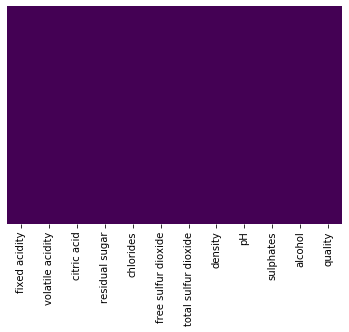

In [13]:
# check whether there is no data in attibutes by graph, a smart idea
ax = sns.heatmap(wine.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.
- If there were any, you would've noticed in figure represented by different colour shade on purple background.
- This is a smart way to check in data set with missing data or not with the function `.isnull()` can b

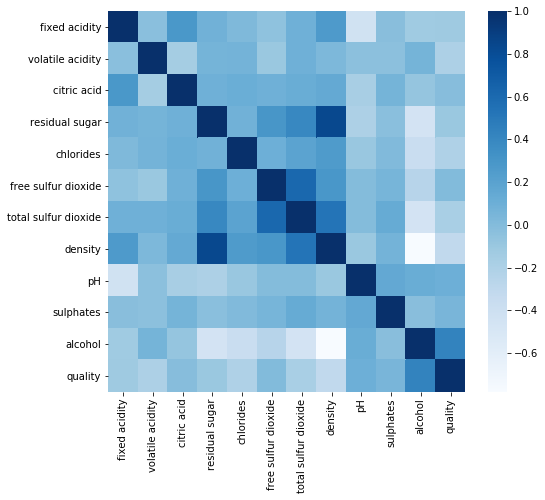

In [14]:
plt.figure(figsize=(8,7))
ax = sns.heatmap(wine.corr(),cmap='Blues',annot=False)

- Dark shades represents positive correlation while lighter shades represents negative correlation.

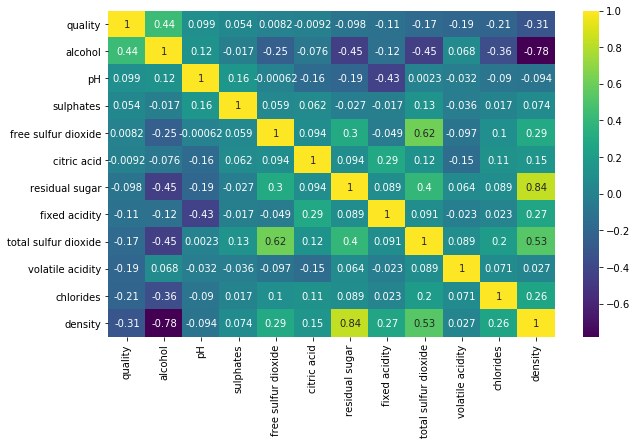

In [15]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = wine.corr().nlargest(k, 'quality')['quality'].index
cm = wine[cols].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(cm, annot=True, cmap = 'viridis')

- Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".
- "free sulphur dioxide" and "citric acid" has almost no correlation with "quality"
- Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset.

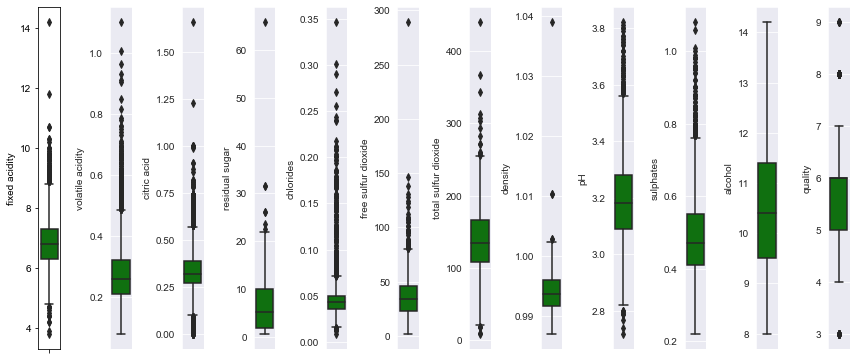

In [16]:
l = wine.columns.to_numpy()
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(wine[l[i]],color='green',orient='v')
    plt.tight_layout()

- Except "alcohol" all other features columns shows outliers. 

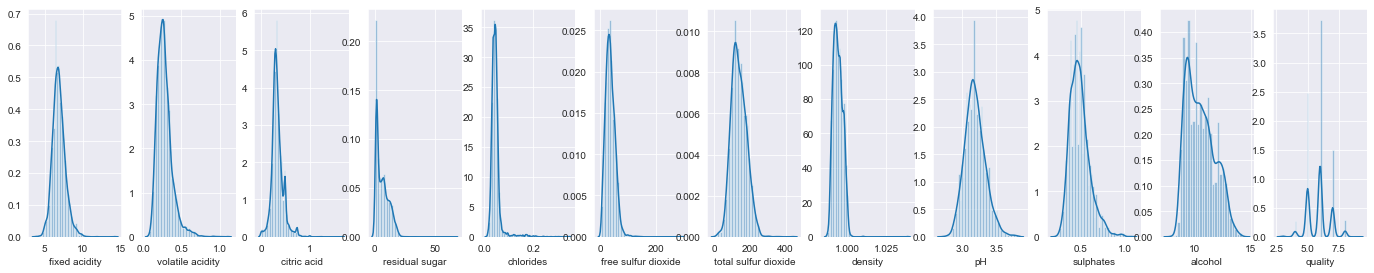

In [17]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(wine[l[i]],kde=True)

- "pH" column appears to be normally distributed
- remaining all independent variables are right skewed/positively skewed.

#### Step 3: Build a Naive Bayesian classifier

In [18]:
from sklearn.model_selection import train_test_split

#wine_features = wine.drop(['free sulfur dioxide','citric acid','quality'], axis=1)
wine_features = wine.drop(['quality'], axis=1)
wine_label = wine.quality

# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_label, train_size=0.8, test_size=0.2,
                                                                random_state=0)

- split the data set into train set (80% of the data) and test set (20% of the data)

Accuracy:  0.44285714285714284
Predicted  3   4    5    6    7  8
Actual                            
3          3   3    0    2    1  0
4          1  11   17   18    4  0
5          2  11  149  107   26  0
6          6   4  101  154  143  1
7          0   0   18   46  116  3
8          0   0    1   12   19  1


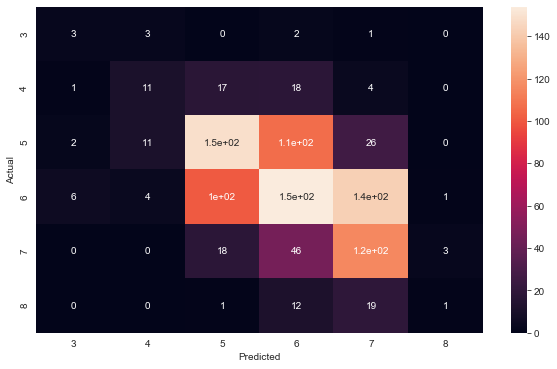

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb = GaussianNB()   # we use the default options with Gaussian Naive Bayesian Method set by scikit-learn
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_test_pred = nb.predict(X_test)

#evaluate the classifier by score
print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))
#evaluate the classifier by confusion matrix
confusion_matrix = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

- The Naive Bayesian classifier seems not very successful in the work. So let us use another method for a comparison.

Accuracy:  0.6510204081632653
Predicted  4    5    6   7  8
Actual                       
3          0    4    5   0  0
4          6   24   20   1  0
5          0  191  102   2  0
6          0   47  336  26  0
7          0    5   80  96  2
8          0    1   13  10  9


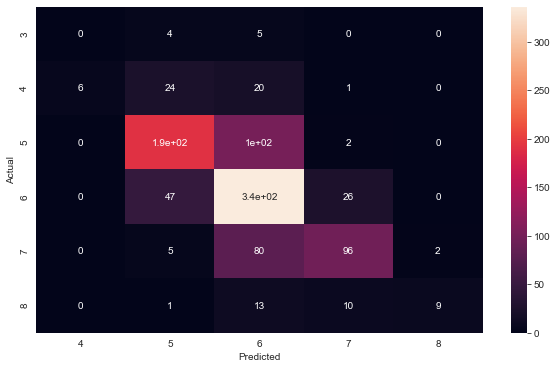

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_clf = RandomForestClassifier(n_estimators = 500)  # we use the default options with Gaussian Naive Bayesian Method set by scikit-learn
rf_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_test_pred = rf_clf.predict(X_test)

#evaluate the classifier by score
print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))
#evaluate the classifier by confusion matrix
confusion_matrix = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

Finally, we conclude that Naive Bayesian is a very fast algorithm to deal with large data set, but it relies on the independent feature assumption which is never true in real world. If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the Naive Bayesian model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.

The interfaces to Naive Bayesian in scikit-learn:

`sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)`
